# 2.1 Objective

To perform a comprehensive exploratory data analysis (EDA) on the HelpSteer Dataset to
understand the data's characteristics and attribute correlations.

In [1]:
!pip install datasets


In [2]:
from datasets import load_dataset
import pandas as pd

# Load the dataset splits
dataset = load_dataset("nvidia/HelpSteer")
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])


README.md:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

train.jsonl.gz:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

validation.jsonl.gz:   0%|          | 0.00/813k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/35331 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1789 [00:00<?, ? examples/s]

In [3]:
train_df.head()

,prompt,response,helpfulness,correctness,coherence,complexity,verbosity
0,What are the three most important things to co...,To build an assistive device to help an elderl...,3,4,4,2,2
1,What are the three most important things to co...,There are many different types of assistive de...,4,3,3,2,3
2,What are the three most important things to co...,When deciding what technology to use to build ...,4,4,4,2,2
3,What are the three most important things to co...,You can create an assistant device to help an ...,3,3,3,2,3
4,Background:\n<start of reference>\nFamily doct...,"Hi there! I'm Dr. Family, and I'm here to tell...",3,3,3,2,1


In [4]:
validation_df.head()

,prompt,response,helpfulness,correctness,coherence,complexity,verbosity
0,The reference text below provides context for ...,A woman who helped her cousin retrieve her bel...,3,2,3,2,2
1,The reference text below provides context for ...,A woman who tried to help her cousin retrieve ...,2,2,3,1,2
2,The following information may be useful:\n<sta...,The protagonist has a very casual attitude tow...,3,2,3,1,1
3,The following information may be useful:\n<sta...,The protagonist has a positive attitude toward...,3,3,3,2,1
4,The following information may be useful:\n<sta...,The protagonist's attitude toward swear words ...,3,3,3,2,2


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35331 entries, 0 to 35330
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prompt       35331 non-null  object
 1   response     35331 non-null  object
 2   helpfulness  35331 non-null  int64 
 3   correctness  35331 non-null  int64 
 4   coherence    35331 non-null  int64 
 5   complexity   35331 non-null  int64 
 6   verbosity    35331 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.9+ MB


In [16]:
# Select only numeric columns for the correlation matrix
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the Pearson correlation matrix for numeric attributes in the training dataset
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


             helpfulness  correctness  coherence  complexity  verbosity
helpfulness     1.000000     0.852189   0.634446    0.235142   0.256832
correctness     0.852189     1.000000   0.625143    0.247207   0.256181
coherence       0.634446     0.625143   1.000000    0.125127   0.142405
complexity      0.235142     0.247207   0.125127    1.000000   0.630548
verbosity       0.256832     0.256181   0.142405    0.630548   1.000000


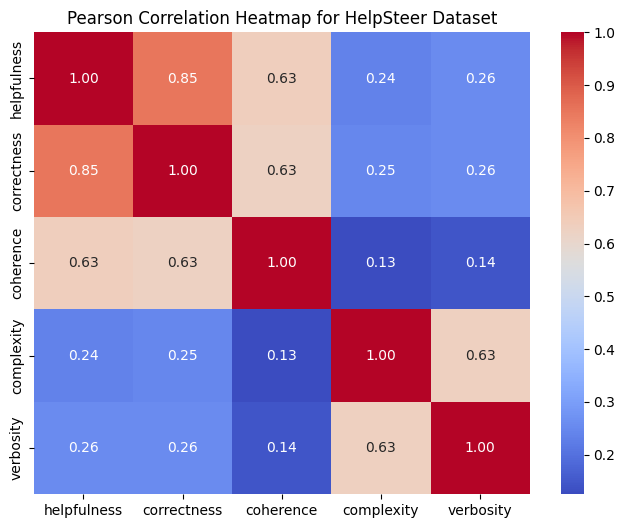

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap for the Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for HelpSteer Dataset")
plt.show()

In [17]:
# Check correlation of each feature with the target variable 'complexity'
complexity_correlations = correlation_matrix['complexity'].sort_values(ascending=False)
print(complexity_correlations)


complexity     1.000000
verbosity      0.630548
correctness    0.247207
helpfulness    0.235142
coherence      0.125127
Name: complexity, dtype: float64
